<a href="https://colab.research.google.com/github/souzajvp/educational/blob/main/Qu%C3%ADmica-computacional/Introdu%C3%A7%C3%A3o_rdkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Química computacional em python!

Instalando e importando bibliotecas

In [1]:
!pip install kora
import kora.install.rdkit

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

## O pacote rdkit...
traz diversas funcionalidades interessantes para auxiliar o trabalho de busca por novos fármacos. Com ele, podemos trabalhar com bibliotecas de moléculas e estudar suas propriedades.

Como um pequeno exemplo, vamos trabalhar com a **molécula de glicose**. A glicose é um dos carboidratos (açúcares) mais importantes para a biologia. De forma bem simples, é um dos produtos da fotossíntese e glicose é usada como fonte de energia para inúmero processos que ocorrem em bactérias, fungos, plantas e humanos!

### Visualizando a molécula de glicose
Aqui usamos o formato SMILES, que é uma representação textual (1D) de moléculas. A partir dessa representação, podemos gerar a estrutura molecular da glicose.

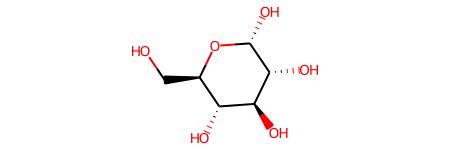

In [2]:
glicose = Chem.MolFromSmiles("OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H](O)[C@@H](O)1")
glicose

### Calculando algumas propriedades químicas

In [3]:
import pandas as pd
from rdkit.Chem import Descriptors

In [4]:
# Calculando o peso molecular da glicose
peso_mol = Descriptors.MolWt(glicose)
# Calculando o número de átomos da glicose
n_atomos = glicose.GetNumAtoms(onlyExplicit=False)

print(f"A glicose tem {n_atomos} átomos e um peso molecular de {peso_mol}")

A glicose tem 24 átomos e um peso molecular de 180.156


## Biblioteca de moléculas
Indo um pouco além, podemos executar uma análise quanto aos compostos já descobertos que tem alguma atividade contra a bactéria causadora da Tuberculose (*Mycobacterium tuberculosis*). Todos esses dados foram coletados da literatura científica e são disponibilizados gratuitamente na base [ChEMBL](https://www.ebi.ac.uk/chembl/).



In [5]:
url = "https://raw.githubusercontent.com/souzajvp/educational/main/Qu%C3%ADmica-computacional/mtb_acitivity.csv"
df = pd.read_csv(url, sep=';')

In [6]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL3609546,NaN,0,384.48,0,4.22,31,COc1ccc2c(c1)-c1ccccc1C2N1CCN(C(=O)c2ccccc2)CC1,MIC,'=',26000.0,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL3611169,Antimycobacterial activity against Mycobacteri...,F,BAO_0000218,organism-based format,Mycobacterium tuberculosis H37Rv,None,None,None,None,NaN,NaN,NaN,CHEMBL2111188,Mycobacterium tuberculosis H37Rv,Mycobacterium tuberculosis H37Rv,ORGANISM,CHEMBL3608306,1,Scientific Literature,Eur. J. Med. Chem.,2015.0,None,NaN
1,CHEMBL3609547,NaN,0,412.53,1,5.00,32,CCCOc1ccc2c(c1)-c1ccccc1C2N1CCN(C(=O)c2ccccc2)CC1,MIC,'=',24200.0,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL3611169,Antimycobacterial activity against Mycobacteri...,F,BAO_0000218,organism-based format,Mycobacterium tuberculosis H37Rv,None,None,None,None,NaN,NaN,NaN,CHEMBL2111188,Mycobacterium tuberculosis H37Rv,Mycobacterium tuberculosis H37Rv,ORGANISM,CHEMBL3608306,1,Scientific Literature,Eur. J. Med. Chem.,2015.0,None,NaN
2,CHEMBL240533,NaN,0,354.45,0,4.21,1,O=C(c1ccccc1)N1CCN(C2c3ccccc3-c3ccccc32)CC1,MIC,'=',56500.0,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL3611170,Antimycobacterial activity against Mycobacteri...,F,BAO_0000218,organism-based format,Mycobacterium tuberculosis H37Rv,None,None,None,None,NaN,NaN,NaN,CHEMBL2111188,Mycobacterium tuberculosis H37Rv,Mycobacterium tuberculosis H37Rv,ORGANISM,CHEMBL3608306,1,Scientific Literature,Eur. J. Med. Chem.,2015.0,None,NaN
3,CHEMBL3596715,NaN,0,336.34,0,4.25,5at,O=C(NCc1ccc(C(F)(F)F)cc1)c1nc2ccccc2s1,MIC99,'=',12.5,ug ml-1,NaN,NaN,NaN,UO_0000274,NaN,NaN,NaN,NaN,False,CHEMBL3598492,Antimycobacterial activity against Mycobacteri...,F,BAO_0000218,organism-based format,Mycobacterium tuberculosis H37Rv,None,None,None,None,NaN,NaN,NaN,CHEMBL2111188,Mycobacterium tuberculosis H37Rv,Mycobacterium tuberculosis H37Rv,ORGANISM,CHEMBL3596139,1,Scientific Literature,MedChemComm,2014.0,None,NaN
4,CHEMBL3596735,NaN,0,410.42,0,4.30,5cz,COc1ccc(CCNC(=O)c2nc3cc(C(F)(F)F)ccc3s2)cc1OC,MIC99,'=',25.0,ug ml-1,NaN,NaN,NaN,UO_0000274,NaN,NaN,NaN,NaN,False,CHEMBL3598492,Antimycobacterial activity against Mycobacteri...,F,BAO_0000218,organism-based format,Mycobacterium tuberculosis H37Rv,None,None,None,None,NaN,NaN,NaN,CHEMBL2111188,Mycobacterium tuberculosis H37Rv,Mycobacterium tuberculosis H37Rv,ORGANISM,CHEMBL3596139,1,Scientific Literature,MedChemComm,2014.0,None,NaN


In [7]:
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties'],
      dtype='object')

Temos diversas informações interessantes. Por enquanto, vou manter o 'Molecule ChEMBL ID', 'Molecule Name', 'Molecular Weight', 'AlogP', 'Smiles', 'Standard Type', 'Standard Value' e 'Standard Units'

In [8]:
manter = ['Molecule ChEMBL ID', 'Molecule Name', 'Molecular Weight', 'AlogP', 
          'Smiles', 'Standard Type', 'Standard Value', 'Standard Units']
moleculas = df[manter].copy()

In [9]:
# filtrando o tipo de atividade
moleculas = moleculas[moleculas['Standard Type'].isin(["MIC", "ug.mL-1"])]

### Agora podemos gerar algumas visualizações

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
moleculas.AlogP = moleculas.AlogP.replace('None', np.nan).astype(float)

In [12]:
moleculas["Atividade"] = (moleculas["Standard Value"] < 10).replace([True, False],
                                      ["Menor que 10",
                                       "Maior ou igual a 10"])
moleculas["Atividade"].value_counts()

Maior ou igual a 10    10192
Menor que 10            3178
Name: Atividade, dtype: int64

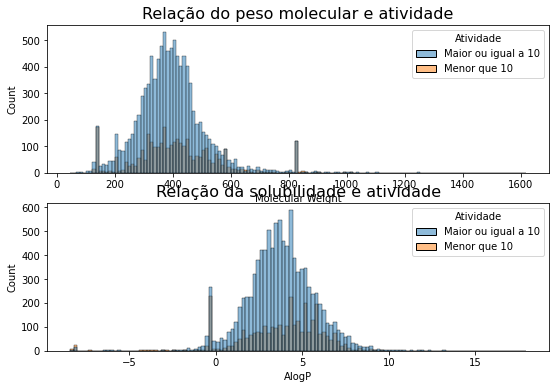

In [13]:
fig, ax = plt.subplots(2,1, figsize=(9,6))
sns.histplot(data=moleculas, x='Molecular Weight',
                  hue="Atividade", ax=ax[0])
ax[0].set_title("Relação do peso molecular e atividade", fontsize=16)

sns.histplot(data=moleculas, x='AlogP',
                  hue="Atividade", ax=ax[1])
ax[1].set_title("Relação da solubilidade e atividade", fontsize=16);

### Comparando algumas moléculas

In [14]:
pior = moleculas.sort_values("Standard Value").Smiles.values[-1]
pior = Chem.MolFromSmiles(pior)

rif = moleculas.loc[72, "Smiles"]
rif = Chem.MolFromSmiles(rif)

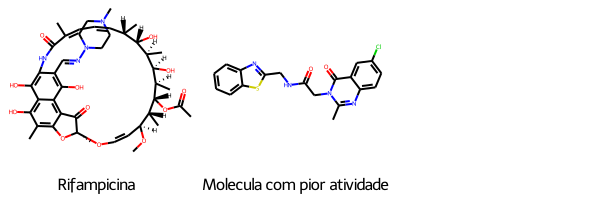

In [15]:
Draw.MolsToGridImage([rif, pior],
                     legends=['Rifampicina','Molecula com pior atividade'])

A **rifampicina** é um dos antibióticos mais usados no tratamento da Tuberculose. Ela é muito efetiva, porém tem efeitos tóxicos para o paciente. A partir dessa biblioteca grande, poderíamos procurar: 
1. Diferenças entre os antibióticos disponíveis e as moléculas com atividade experimental;
2. Criar modelos para prever a atividade de uma molécula nova;
3. Criar modelos para prever a solubilidade de moléculas não conhecidas.